In [1]:
from astropy.io import fits 
import matplotlib.pyplot as plt
import numpy as np 
from scipy.optimize import minimize, rosen, rosen_der
from scipy import interpolate
import scipy
import os 
from scipy.optimize import curve_fit
from scipy.integrate import simps
import math
from astropy.cosmology import WMAP9 as cosmo
from astroquery.mast import Observations
import csv
import time

In [ ]:
#https://mast.stsci.edu/api/v0/_c_a_o_mfields.html
#https://astroquery.readthedocs.io/en/latest/mast/mast.html#id1
#https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html
#https://outerspace.stsci.edu/display/MASTDOCS/Search+a+List+of+Targets
#https://www.stsci.edu/hst/instrumentation/wfc3/performance/throughputs

In [2]:
#madcows1 = fits.open("C:/Users/19133/Documents/cows_official.fits")
madcows = fits.open("C:/Users/19133/Documents/Research/UMKC/MC2_2.fits")

In [3]:
madcows[1].data['RA'][0]

332.9445360976961

In [22]:
with open('C:/Users/19133/Documents/Research/UMKC/MAST_ACS_8_14.csv', 'w', newline='') as csvfile:
    fieldnames = ['obsids','parent_obsid','MADCOW_id','file']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

In [33]:
start = time.time()

for x in range(3000,3500):
    
    ra = str(madcows[1].data['RA'][x])
    dec = str(madcows[1].data['DEC'][x])
    obs_table = Observations.query_criteria(coordinates= ra + " " + dec,radius='0.03 deg',filters=
                                                ['F475W','F555W','F606W','F625W','F775W','F435W',
                                                'F814W','F850LP'],instrument_name='ACS/WFC')
    
    #for y in obs_table['obsid']:
    if len(obs_table['obsid']) > 0:
        y = obs_table['obsid'][0]
        data_products = Observations.get_product_list(y)
        products = Observations.filter_products(data_products,productType=["SCIENCE"],
                                                calib_level=[3,4],extension="fits")

        t_or_f = np.zeros(len(products['productFilename']),dtype='str')

        for x in range(len(products['productFilename'])):

            t_or_f[x] = str('all' in products['productFilename'][x]
                              or 'drz' in products['productFilename'][x] 
                              or 'total' in products['productFilename'][x])

        inds_all = np.where(t_or_f == 'T')

        if len(inds_all) > 0:

            manifest = Observations.download_products(products[inds_all])
                        #can write this better and work in arrays 

            for z in inds_all:

                with open('C:/Users/19133/Documents/Research/UMKC/MAST_ACS_8_14.csv', 'a', newline='') as csvfile:
                    fieldnames = ['obsids','parent_obsid','MADCOW_id','file']
                    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
                    writer.writerow({'obsids':products['obsID'][z],
                                     'parent_obsid':y,
                                     'MADCOW_id':madcows[1].data['ID'][x],
                                     'file':products['productFilename'][z]})
        else:

            pass
    else:
        pass

end = time.time()
print("The time of execution of above program is :",(end-start))

INFO: Found cached file ./mastDownload\HST\hst_10092_7e_acs_wfc_total_j8xi7e\hst_10092_7e_acs_wfc_total_j8xi7e_drc.fits with expected size 292340160. [astroquery.query]
INFO: Found cached file ./mastDownload\HST\hst_10092_ce_acs_wfc_total_j8xice\hst_10092_ce_acs_wfc_total_j8xice_drc.fits with expected size 300934080. [astroquery.query]


The time of execution of above program is : 2520.300078868866


In [34]:
end-start

2520.300078868866

In [35]:
ten = 34.10638399124146*10
hundred = 5.684397331873575*60
fivehun = 2520.300078868866
thousand = 67.7765793522199*60

C:\Users\19133\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


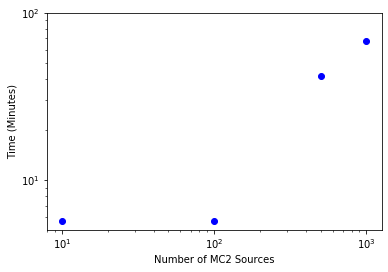

In [42]:
plt.plot([10,100,500,1000],[ten/60,hundred/60,fivehun/60,thousand/60],'bo')
plt.loglog()
plt.ylim(0,10**2)
plt.xlabel('Number of MC2 Sources')
plt.ylabel('Time (Minutes)')
plt.savefig('time.png')

In [ ]:
#one source has multiple matching obsids 
#each obsid has multiple products: so we just choose good ones 

#if productFilename in products has calib_level >= 3 and 'drz' or 'total' in the name, downlaod 
#save MC2ID, obsid, parent_obsid, filename

In [ ]:
import glob
for name in glob.glob('C:/Users/19133/Documents/Research/mastDownload/*/*/*'):
    basename = os.path.basename(name)
    os.rename(name, "C:/Users/19133/Documents/Research/mastDownload/"+basename)

In [ ]:
from astropy.io import ascii
data = ascii.read('C:/Users/19133/Documents/MAST_matching_targets_8_14.csv')